<h1>Lab 6 - Fabry Perot Interferometer</h1>

**EE/PHY 450/550**

**Scott Prahl**

**8 May 2017, Version 2**

In [1]:
# Execute these lines before starting the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# if this is not present you will need to install using `pip install pypolar`
import pypolar.fresnel as fresnel

def Airy(delta,F):
    return 1/(1+F*np.sin(delta/2)**2)

def FabryPerotRingT(r,lambda0,R,ell,f):
    F = 4*R/(1-R)**2
    theta=np.arctan(r/f)
    delta = 4*np.pi/lambda0*ell*np.cos(theta)
    delta_r = np.angle(fresnel.r_per(m, theta))
    return Airy(delta+delta_r,F)

# Background

The Fabry-Perot interferometer has an etalon comprised of two parallel, partially mirrored surfaces $M_1$ and $M_2$. Light incident on the etalon will bounce back and forth and exit $M_2$ at the same angle it was incident on $M_1$.
(Just ignore light that should be exiting from $M_1$ at each bounce.)
A lens $L$ will redirect all rays onto a point on a screen that is one focal length from the lens. 
*Everyone should be able to locate the point in the focal plane that light at this angle will be focused.  If not, refresh your memory by reading your favorite geometric optics textbook.*

<img src="http://omlc.org/~prahl/host/450/week6/fabry-perot.png" width="50%">

With a bit of thought, it is clear that *any* ray parallel to the incident ray above will be imaged to the same place.  
Rays that enter at the same angle but from above will be imaged to a point in the focal plane an equal distance on the other side of the centerline.  

<img src="http://omlc.org/~prahl/host/450/week6/fabry-perot2.png" width="50%">

If $\mathbf{n}$ is a unit vector normal to the etalon and incident ray is $\mathbf{r}$ then the angle between the rays is just the dot product
$$
\cos\theta = \mathbf{r} \cdot \mathbf{n}
$$

If the whole diagram above is rotated about the centerline, then the rays will be imaged to other points an equal distance from the centerline.  All such rays will create a ring.  Furthermore, $\cos\theta$ is a constant for each point on the ring and therefore the phase difference accumulated each bounce
$$
\delta = 2 k \ell \cos\theta
$$
will be unaffected and therefore the amount of constructive or destructive interference is also constant.

*In this experiment, when using the low pressure sodium lamp, the lens in your eye will serve as the lens $L$ and your retina will be the screen.*

## Fringes

The total phase difference is for a ray that has bounced twice in the etalon is
$$
\Delta=\delta+\delta_r=2k\ell\cos\theta+\delta_r
$$
where $\delta_r$ is the phase change for two reflections.  If the contributions from all rays are added together (and the field is squared) the transmitted intensity will be
$$
T_\mathrm{total} =\frac{T^2}{1+R^2-2R\cos\delta}
$$
for a mirror reflectivity of $R$. If we neglect any mirror losses (i.e., we let $T=1-R$)
$$
T_\mathrm{total} ={1\over 1+ F \sin^2 {\Delta\over2}}
$$
where the finesse $F$ is
$$
F={4R\over (1-R)^2}
$$

The reflected fields from a surface with refractive index $m=n-i\kappa$ are $r_s=|r_s| e^{i\phi_s}$ and $r_p=|r_p| e^{i\phi_p}$, where $\phi_s$ and $\phi_p$ are the phase changes in the reflected fields.  
$$
r_p = {m\cos\theta_i-\cos\theta_t \over m\cos\theta_i+\cos\theta_t }
\qquad\mbox{and}\qquad
r_s = {\cos\theta_i-m\cos\theta_t \over \cos\theta_i+m\cos\theta_t }
$$
The python function `np.angle()` will return the argument of the complex reflectance.  The only tricky part is that the phase returned in the parallel case is off by $2\pi$.

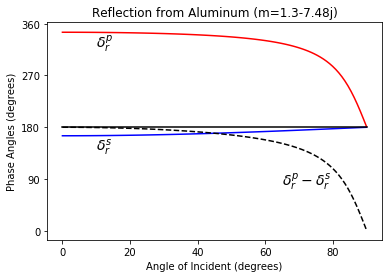

In [2]:
m=1.3-7.48*1j                     # Index of refraction for aluminum at 620nm
theta = np.linspace(0,89.9,100)   # Angle of incidence

rs = fresnel.r_per(m, np.radians(theta))
rp = fresnel.r_par(m, np.radians(theta))
sphase = np.degrees(np.angle(rs))
pphase = np.degrees(np.angle(rp))+360

plt.plot(theta,sphase,color="blue")
plt.plot(theta,pphase,color="red")
plt.plot(theta,pphase-sphase,'--',color="black")

plt.plot([0,90],[180,180], color="black")

plt.xlabel("Angle of Incident (degrees)")
plt.ylabel("Phase Angles (degrees)")
plt.title("Reflection from Aluminum (m=1.3-7.48j)")
plt.yticks(np.arange(0, 361, 90))

plt.text(10,320,'$\delta_r^p$', fontsize=14)
plt.text(10,140,'$\delta_r^s$', fontsize=14)
plt.text(65,80,'$\delta_r^p-\delta_r^s$', fontsize=14)

plt.show()

Since we will be looking at low angle values, we see that the phase change at reflection is nearly constant for near-normal incidence angles

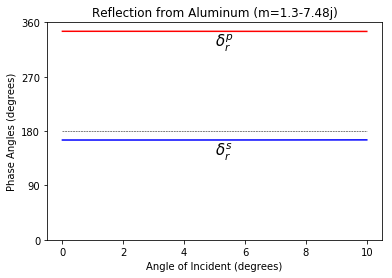

In [3]:
#at 620nm, m=1.3-7.48, for aluminum

m=1.3-7.48*1j
theta = np.linspace(0,10,100)
rs = fresnel.r_per(m, np.radians(theta))
rp = fresnel.r_par(m, np.radians(theta))
sphase = np.degrees(np.angle(rs))
pphase = np.degrees(np.angle(rp))+360


plt.plot(theta,sphase,color="blue")
plt.plot(theta,pphase,color="red")

plt.plot([0,10],[180,180],'--', color="black",linewidth=0.5)

plt.xlabel("Angle of Incident (degrees)")
plt.ylabel("Phase Angles (degrees)")
plt.title("Reflection from Aluminum (m=1.3-7.48j)")
plt.yticks(np.arange(0, 361, 90))

plt.annotate('$\delta_r^p$', xy=(5, 320), size=15)
plt.annotate('$\delta_r^s$', xy=(5, 140), size=15)

plt.show()

The screen will be at a distance $f$ (why?) and the angle $\theta$ is
$$
\tan\theta = {r\over f}
$$
where $r$ is the radius of a ring.  Therefore 
$$
\delta = 2k\ell \cos \tan^{-1} (r/f)= {4\pi\ell\over\lambda} {f\over\sqrt{f^2+r^2}}
$$

Fringes will be seen when
$$
2 n d \cos\theta_m = m \lambda
$$
where $n$ is the index of refraction inside the etalon, $d$ is the separation between the mirrors, $\theta_m$ is the angle, $m$ is the order of the fringe, and $\lambda$ is the wavelength.

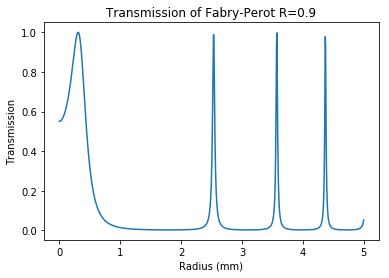

In [4]:
mm=1e-3                       # m
nm=1e-9                       # m
lambda0 = 632.8*nm            # m
f=100*mm                      # m
ell = 1*mm                    # m
r=np.linspace(0,5,1000)*mm    # m
R=0.9

plt.plot(r/mm,FabryPerotRingT(r,lambda0,R,ell,f))
plt.title("Transmission of Fabry-Perot R=0.9")
plt.xlabel("Radius (mm)")
plt.ylabel("Transmission")
plt.show()

### Monochromatic Source
A monochromatic source will have a single set of concentric rings.
The result for a HeNe beam focused to a point before the etalon (so monochromatic light will be incident at all angles on the Fabry Perot interferometer) will give different results depending on the mirror reflectivity of the etalon.

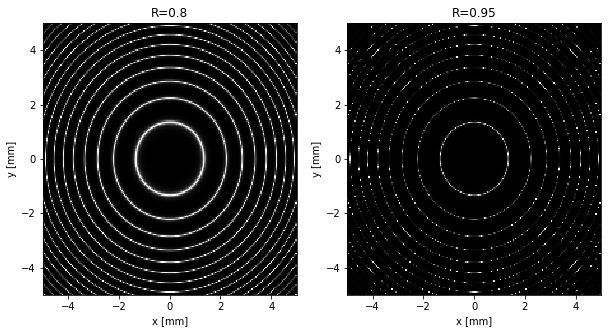

In [5]:
mm=1e-3                       # m
nm=1e-9                       # m
lambda0 = 632.8*nm            # m
f=100*mm                      # m
ell = 2*mm                    # m

x = np.linspace(-5, 5, 200)   
y = np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)*mm   # m

fig,ax = plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
plt.pcolor(X, Y, FabryPerotRingT(r,lambda0,0.8,ell,f), cmap='gray')
ax[0].set_aspect('equal')
plt.title('R=0.8')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')

plt.subplot(1,2,2)
plt.pcolor(X, Y, FabryPerotRingT(r,lambda0,0.95,ell,f), cmap='gray')
ax[1].set_aspect(1)
plt.title('R=0.95')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.show()

A source with two wavelengths (like the low pressure sodium lamp) will have two different sets of concentric rings.  The emission lines from the sodium lamp are at $\lambda_1=589.6$nm and $\lambda_2=589.0$nm.  The spacing of each set of rings depends on the etalon thickness $\ell$.  Here are four plots showing the progression from perfectly separate to nearly overlapping.

lambda1 = 589.6e-9
lambda2 = 589.0e-9
f=100e-3
R=0.8

x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)*1e-3

ell = 1.01e-3
T=FabryPerotRingT(r,lambda1,R,ell,f)+ FabryPerotRingT(r,lambda2,R,ell,f)
plt.axes().set_aspect(1)
plt.pcolor(X, Y, T, cmap='gray')
plt.title('$\ell=1.01$mm (separated)')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.show()

ell = 1.09e-3
T=FabryPerotRingT(r,lambda1,R,ell,f)+ FabryPerotRingT(r,lambda2,R,ell,f)
plt.axes().set_aspect(1)
plt.pcolor(X, Y, T, cmap='gray')
plt.title('$\ell=1.09$mm (intermediate)')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.show()

ell = 1.16e-3
T=FabryPerotRingT(r,lambda1,R,ell,f)+ FabryPerotRingT(r,lambda2,R,ell,f)
plt.axes().set_aspect(1)
plt.pcolor(X, Y, T, cmap='gray')
plt.title('$\ell=1.16$mm (overlapping)')
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')
plt.show()

The separation between the two wavelengths $\lambda_1$, and $\lambda_2$ may be found by observing when fringes (concentric rings) overlap.  When this happens, the path difference in the interferometer is such that
$$
m_1 \lambda_1= m_2 \lambda_2,
$$ 
where $m_1$ and $m_2$ are integers. The next coincidence, as the order of interference is increased, is $m_3$ fringes away or
$$
(m_1+m_3)\lambda_1 = (m_2+m_3+1)\lambda_2,
$$ 
where again $m_3$ is an integer. By subtraction, or 
$$
\lambda_1-\lambda_2= \lambda_2/m_3.
$$
Thus if $\lambda_2$ is known with reasonable accuracy and, $m_3$, the number of fringes of $\lambda_1$ between coincidences, is known, the difference $\lambda_1-\lambda_2$ is known. 
 
If instead of counting fringes, the corresponding plate displacement, $d$, is measured, then $m_3 = 2d/\lambda_1$, so that 
$$
\lambda_1-\lambda_2 = \lambda_1\lambda_2/2d\approx \lambda_2^2/2d.
$$

## Pre-lab Questions

### Problem 1
How will you determine $\lambda_1$ using the interferometer?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 2
What would you observe if expanded and collimated light from a HeNe laser was passed through the Fabry Perot interferometer?

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 3
What is an estimate for $m_1$ for the sodium line for a mirror separation of 8.000000 mm?

In [6]:
theta   = 0      # degrees
lambda1 = 589e-9 # meters
lambda2 = 589.6e-9
d = 8e-3         # meters
n = 1
# YOUR CODE HERE
raise NotImplementedError()

print("For an %.0fmm air-gap in a Fabry Perot etalon will have need about %.0f" % (d*1000,fringes))

For an 8mm air-gap in a Fabry Perot etalon will have need about 27165


### Problem 4
Explain what $m_3$ is and why it is related to the wavelength difference between the two sodium lines.

---
## <span style="color:red">Student Answer</span>

*Double-click and add your answer between the lines*

---

### Problem 5
Approximately what is $m_3$ for the sodium lines?

In [7]:
theta   = 0      # degrees
lambda1 = 589e-9 # meters
lambda2 = 589.6e-9
d = 8e-3         # meters
n = 1
# YOUR CODE HERE
raise NotImplementedError()
print("For the two sodium lines m_3 is about %.0f" % m_3)

For the two sodium lines m_3 is about 982


### Problem 6
What is the plate displacement  in the previous problem?** Answer: 579microns

In [8]:
theta   = 0      # degrees
lambda1 = 589e-9 # meters
lambda2 = 589.6e-9
d = 8e-3         # meters
n = 1
# YOUR CODE HERE
raise NotImplementedError()
print("The plate separation will be about %.3f mm" % (separation*1e3))

The plate separation will be about 0.289 mm


### Problem 7 (550 students)
Find integer values of $m_1$ and $m_2$ which satisfy $m_1\lambda_1=m_2\lambda_2$ **and** are less than 5000.

In [9]:
# YOUR CODE HERE
raise NotImplementedError()

### Problem 8 (550 students)
What is the magnitude of the error in the approximation for $\Delta\lambda$ in letting $\lambda_1=\lambda_2$ above?

In [10]:
# YOUR CODE HERE
raise NotImplementedError()

## Experiment

The alignment challenge is to get the mirrors parallel to each other.  Like with the Michelson interfometer, one mirror will translate and the other will tilt.  The fringes will be narrower and brighter (on a broad dark background) than those seen in the Michelson interferometer.  The fringes will totally disappear with a $\pm3^\circ$ turn of either knob on the tilting mirror.

To make things more confusing, your eyes will want to focus on the static fringes caused by the internal reflections within each mirror.  These fringes will not move when either mirror is adjusted.  Ignore these fringes.

The fringes you are interested in will be located at infinity.  You will need to relax your eye (as if you were focusing on a far object) to see these fringes.  Relaxing your eye is a skill and may take a bit of practice.  If you have trouble, then one way to force your eye to focus at infinity is to look through a telescope focused at infinity (i.e. you've adjusted the eyepiece on the telescope to focus on a distant object).

<img src="http://omlc.org/~prahl/host/450/week6/fp-ealing.jpg" width="50%">
Light enters from the left, telescope is on far right.

### Alignment with HeNe

The easiest way to align the interferometer is to use a HeNe laser.  Carefully align the laser so it hits the center of the translation mirror (with no collection lens) and is perpendicular to it.  You may see interference fringes that result from the interaction of the translation mirror and the mirrors in the laser --- align these fringes with the exit aperture on the laser and then ignore them.

Observe the beam that is transmitted through the interferometer using a screen.  You should see a row of dots corresponding to each reflection.  Adjust the tilting mirror so that all the dots converge to a single spot.  Set the screen some distance away from the interferometer so that you can do this accurately.  The plates should be aligned at this point.

Carefully insert the collection lens.

### Alignment with Object

Basic alignment can also be done by looking through the interferometer at the sodium lamp with a collection lens in place.  The sodium lamp (with condenser lens) provides a broad, featureless illumination and therefore is not ideal for visualizing multiple reflections of itself.

The collection lens has a focal length of about 135mm.  Use the telescope to place a small object at the focal distance of the lens (the object will be in focus, but will have multiple image reflections).

Adjust the tilting mirror so that all reflection images converge to the primary image.

### Fine adjustment

You can do this with or without the telescope.

At this point the mirrors should be parallel and the Fabry Perot fringes should be faint but visible.  Verify that your fringes are circular and change when the translation mirror is moved.

Unlike with the Michelson experiment, adjusting the tilt mirror *will not center* the fringes in the field, but will change the contrast of the images.  Make **very minor** adjustments of the tilt mirror to achieve maximum constrast of your fringes.

### Carrier wavelength

To estimate $(\lambda_1+\lambda_2)/2$ measure the distance between 50 fringes.  Each team member should do this five times.  (If you are by yourself, you will do it ten times.)  

>Remember: To get better results, make sure that you always are turning the micrometer the same direction &mdash; backlash in the mechanical screw will cause poor results.  **Record your measurements to three significant digits.  You will need to estimate the last digit based on the distance between tick marks.**  Don't forget that the micrometer has two full turns for each millimeter and that the true distance is 1/5th of the micrometer displacement.

### Fringes between coincidences

<table>
<tr>
<td><img src="http://omlc.org/~prahl/host/450/week6/Natwin.jpg" width="100%"></td>
<td><img src="http://omlc.org/~prahl/host/450/week6/Namid.jpg" width="100%"></td>
<td><img src="http://omlc.org/~prahl/host/450/week6/Nasing.jpg" width="100%"></td>
</tr>
<tr>
<td>Separate </td>
<td>Midway </td>
<td>Coincident</td>
</tr>
</table>
In general, two sets of fringes will be seen in the telescope (left and center in the above picture).  By adjusting the plate separation, these two sets may be brought into coincidence (right picture above). Only one pair of fringes precisely coincide, at a time, but in the practice, the coincidence will appear to extend over a number of fringes. The micrometer screw reading should be noted and the plate separation changed until the fringes which move apart at first are once more brought into coincidence based on the appearance of the more open fringes at the center. 

Choose whichever scenario above you like the most and make five measurements (six numbers, starting value + five increasing measurements).

**550 Students**
You'll do this five times for each of the following cases:
* separate 
* midway
* coincident

# Analysis

Find the average wavelength and the separation between the wavelengths.  Estimate your errors in these two numbers and then report the two sodium doublet wavelengths with an estimated error.